# scNT-seq neuron KCl stimulation

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-18 07:46:07


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "scNT"
data_path = "D:/cuhk/project/velocity/dataset/scRNA-seq/scNT/scNT_processed.h5ad"
adata = sc.read(data_path)

group_key = "time_str"
emb_key = "X_umap"
cluster_edges = [('0', '15'), ('15', '30'), ('30', '60'), ('60', '120')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/3066 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


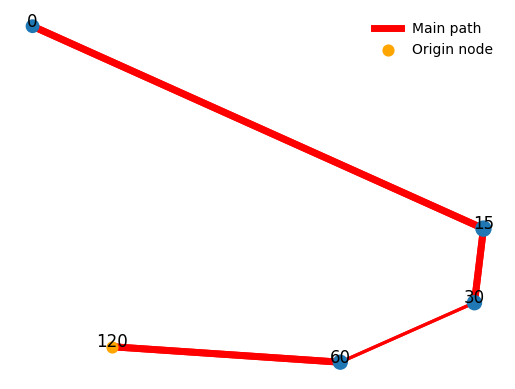


main path: ['120', '60', '30', '15', '0']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 119 out of 143 | elapsed:    9.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 134 out of 143 | elapsed:   10.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   10.9s finished


mean: -17.159 
median: -4.738 
lower quantile: -21.341 
upper quantile: 2.854 
minimum: -193.701 
maximum: 57.513 
No. of positive scores: 48

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:07<00:00, 13.15it/s, cos_s=0.57, cos_u=0.934, mse_s=0.007, mse_u=0.005]

computing velocity graph (using 20/20 cores)


  0%|          | 0/3066 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


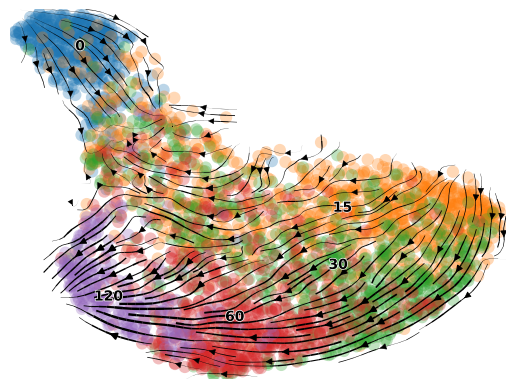

TIVelo:
 CBDir: 0.4662 ICVCoh: 0.6084 
 CBDir2: 0.4807 ICVCoh2: 0.6706 
 TransProbs: 0.4290 VeloCoh: 0.3854


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


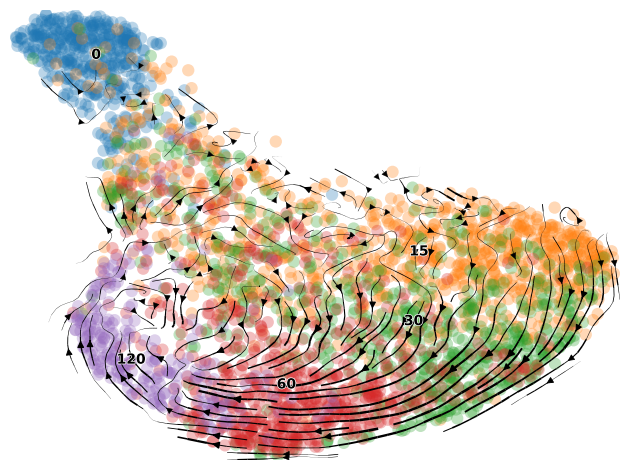

scvelo:
 CBDir: 0.2362 ICVCoh: 0.9175 
 CBDir2: 0.0291 ICVCoh2: 0.4449 
 TransProbs: 0.2177 VeloCoh: 0.0399


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

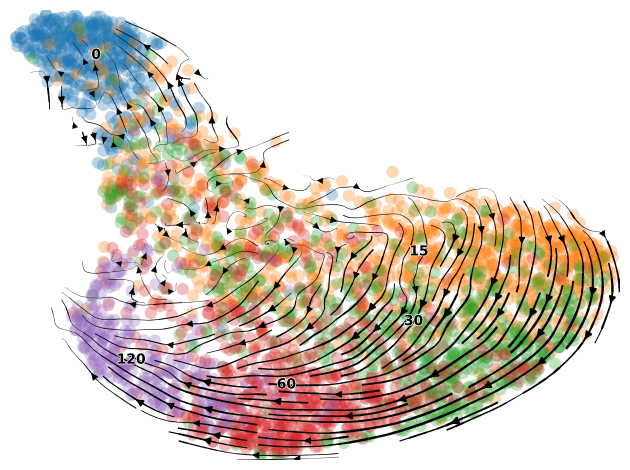

scvelo2:
 CBDir: 0.1542 ICVCoh: 0.8387 
 CBDir2: 0.1154 ICVCoh2: 0.6813 
 TransProbs: 0.1556 VeloCoh: 0.1207


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

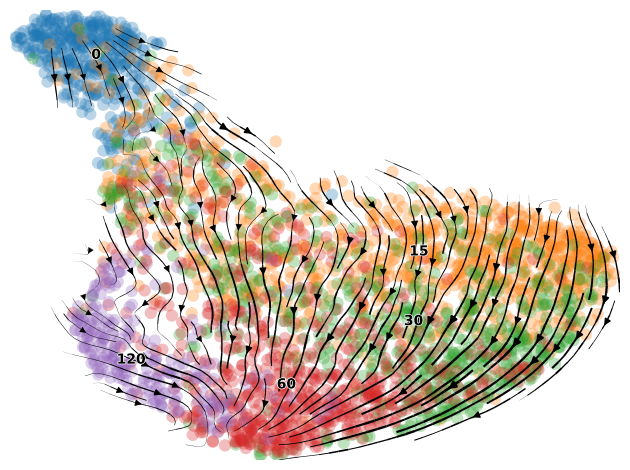

velovi:
 CBDir: 0.3250 ICVCoh: 0.8764 
 CBDir2: 0.1123 ICVCoh2: 0.6977 
 TransProbs: 0.1249 VeloCoh: 0.2349


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

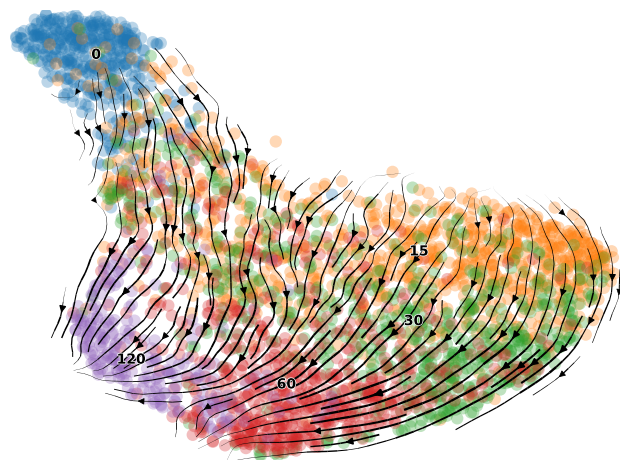

unitvelo:
 CBDir: 0.3546 ICVCoh: 0.9660 
 CBDir2: 0.1921 ICVCoh2: 0.7609 
 TransProbs: 0.1909 VeloCoh: 0.0339


In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

computing velocity graph (using 20/20 cores)


  0%|          | 0/3066 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


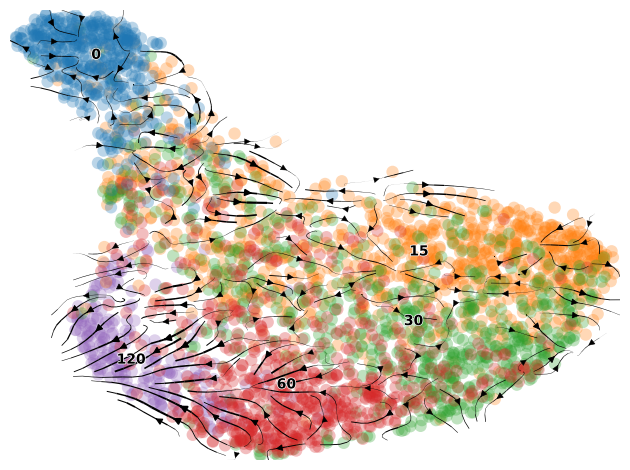

celldancer:
 CBDir: 0.0673 ICVCoh: 0.7757 
 CBDir2: 0.0379 ICVCoh2: 0.1815 
 TransProbs: 0.0018 VeloCoh: -0.1088


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)